In [2]:
import os
print(os.getcwd())
os.chdir('d:/Users/mokky/Documents/GitHub/NUS-ISS/IS02_PT_Capstone_Human_Re-ID')
print(os.getcwd())

d:\Users\mokky\Documents\GitHub\NUS-ISS\IS02_PT_Capstone_Human_Re-ID\notebooks
d:\Users\mokky\Documents\GitHub\NUS-ISS\IS02_PT_Capstone_Human_Re-ID


In [3]:
import sqlite3
from src.database.database import DbQuery
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [207]:
db_path = 'database/reid_db.db'
query = "SELECT name FROM sqlite_master WHERE type='table'"
conn = sqlite3.connect(db_path, detect_types=sqlite3.PARSE_DECLTYPES |
                       sqlite3.PARSE_COLNAMES)
cursor = conn.cursor()
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
qry_results = pd.DataFrame(cursor.fetchall(), columns=column_names)
print(qry_results)
print(column_names)


                name
0    sqlite_sequence
1     vectorkb_table
2    inference_table
3        human_table
4  face_scores_table
['name']


['img_id', 'img_path', 'img', 'vector_tensor', 'create_datetime']


9709

img_id       img_path  \
0  16_3U6R_20210528T105601_30  TO BE REMOVED   
1  20_0EQL_20210528T105608_30  TO BE REMOVED   
2   3_GBJR_20210528T105612_30  TO BE REMOVED   
3   3_7LTE_20210528T105612_30  TO BE REMOVED   
4   3_2L03_20210528T105612_30  TO BE REMOVED   

                                                 img  \
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
1  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
3  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
4  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   

                                       vector_tensor      create_datetime  
0  b'\x80\x03ctorch._utils\n_rebuild_tensor_v2\nq...  2021-05-31 13:41:30  
1  b'\x80\x03ctorch._utils\n_rebuild_tensor_v2\nq...  2021-05-31 13:41:30  
2  b'\x80\x03ctorch._utils\n_rebuild_tensor_v2\nq...  2021-05-31 13:41:30  
3  b'\x80\x03ctorch._utils\n_rebuild_tensor_v2\nq...  2021-05-31 13:41:30  
4  b'\x80\x03ctorch._utils\n_rebuild_tensor_v2\nq...  2021-05-31 13:41:30

array(['16_3U6R_20210528T105601_30', '20_0EQL_20210528T105608_30',
       '3_GBJR_20210528T105612_30', ..., '3_MLRQ_20210530T143114_141060',
       '3_MLRQ_20210530T143128_141090', '3_R056_20210530T143208_141180'],
      dtype=object)

img_id             9709
img_path              1
img                9709
vector_tensor      9709
create_datetime    1077
dtype: int64

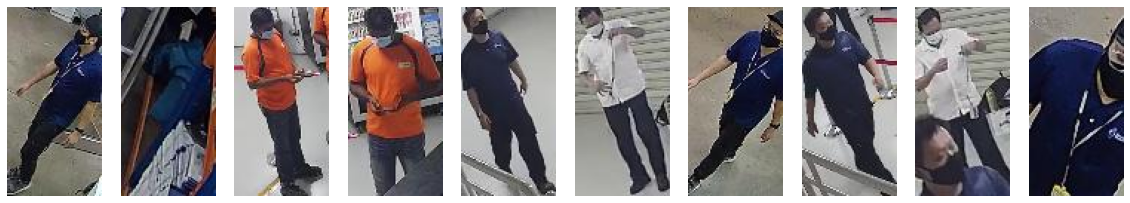

In [38]:
table_name = 'VectorKB_Table'
query = f'SELECT * FROM {table_name}'
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
print(column_names)
qry_results = pd.DataFrame(cursor.fetchall(), columns=column_names)
display(len(qry_results))
display(qry_results.head())
display(qry_results.img_id.unique())
display(qry_results.nunique())
fig, axs = plt.subplots(1, 10, figsize=(20, 15))
for i in range(10):
    img_data = qry_results['img'].iloc[i]
    img = cv2.imdecode(np.frombuffer(img_data, np.uint8), cv2.IMREAD_ANYCOLOR)
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i].axis('off')
plt.show()


In [34]:
table_name = 'human_table'
query = f'SELECT * FROM {table_name}'
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
print(column_names)
qry_results = pd.DataFrame(cursor.fetchall(), columns=column_names)
display(len(qry_results))
display(qry_results.head())
display(qry_results.img_id.unique())
display(qry_results.nunique())


['img_id', 'human_id', 'inference_datetime', 'type']


9709

img_id human_id   inference_datetime type
0  16_3U6R_20210528T105601_30        1  2021-05-31 13:41:30  New
1  20_0EQL_20210528T105608_30        2  2021-05-31 13:41:30  New
2   3_GBJR_20210528T105612_30        3  2021-05-31 13:41:30  New
3   3_7LTE_20210528T105612_30        4  2021-05-31 13:41:30  New
4   3_2L03_20210528T105612_30        5  2021-05-31 13:41:30  New

array(['16_3U6R_20210528T105601_30', '20_0EQL_20210528T105608_30',
       '3_GBJR_20210528T105612_30', ..., '3_MLRQ_20210530T143114_141060',
       '3_MLRQ_20210530T143128_141090', '3_R056_20210530T143208_141180'],
      dtype=object)

img_id                9709
human_id              2873
inference_datetime    1077
type                     2
dtype: int64

['inference_id', 'query_img_id', 'query_img', 'match_1_img_id', 'match_1_img', 'match_1_dist', 'match_2_img_id', 'match_2_img', 'match_2_dist', 'match_3_img_id', 'match_3_img', 'match_3_dist', 'inference_datetime']


9709

inference_id                query_img_id  \
0         22836  16_3U6R_20210528T105601_30   
1         22837  20_0EQL_20210528T105608_30   
2         22838   3_GBJR_20210528T105612_30   
3         22839   3_7LTE_20210528T105612_30   
4         22840   3_2L03_20210528T105612_30   

                                           query_img match_1_img_id  \
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...           None   
1  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...           None   
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...           None   
3  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...           None   
4  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...           None   

                                         match_1_img  match_1_dist  \
0                                               None           NaN   
1  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...      0.540803   
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...      0.211681   
3  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...      0.632076   
4  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...      0.630488   

  match_2_img_id                                        match_2_img  \
0           None                                               None   
1           None                                               None   
2           None  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
3           None  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
4           None  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   

   match_2_dist match_3_img_id  \
0           NaN           None   
1           NaN           None   
2      0.210966           None   
3      0.174797           None   
4      0.432569           None   

                                         match_3_img  match_3_dist  \
0                                               None           NaN   
1                                               None           NaN   
2                                               None           NaN   
3  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...      0.115239   
4  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...      0.322684   

    inference_datetime  
0  2021-05-31 13:41:30  
1  2021-05-31 13:41:30  
2  2021-05-31 13:41:30  
3  2021-05-31 13:41:30  
4  2021-05-31 13:41:30

inference_id          9709
query_img_id          9709
query_img             9709
match_1_img_id        4183
match_1_img           5227
match_1_dist          9704
match_2_img_id        4001
match_2_img           5010
match_2_dist          9704
match_3_img_id        3976
match_3_img           4968
match_3_dist          9701
inference_datetime    1077
dtype: int64

3_2L03_20210528T113136_1380       10
3_ANM7_20210528T163943_12120       9
12_6IP2_20210528T121833_3450       8
3_A6F6_20210528T234306_29730       8
3_2L03_20210528T113307_1440        8
                                  ..
3_F6V2_20210530T072341_115020      1
12_UGIA_20210530T040940_111990     1
12_A5GO_20210528T210017_24990      1
12_5TRX_20210529T125316_66330      1
12_DL05_20210528T220421_27690      1
Name: match_1_img_id, Length: 4183, dtype: int64

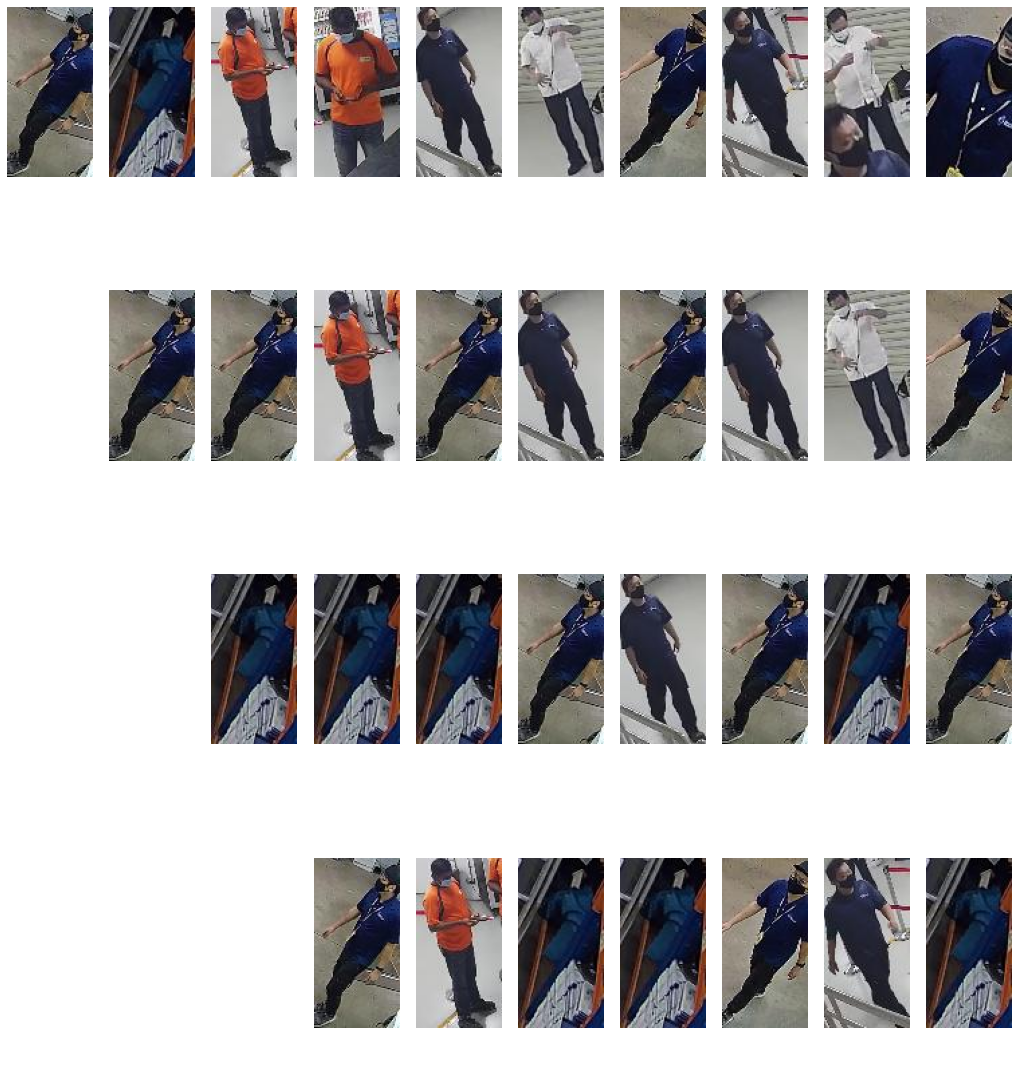

In [51]:
table_name = 'inference_table'
query = f'SELECT * FROM {table_name}'
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
print(column_names)
qry_results = pd.DataFrame(cursor.fetchall(), columns=column_names)
display(len(qry_results))
display(qry_results.head())
display(qry_results.nunique())
display(qry_results.match_1_img_id.value_counts().sort_values(ascending=False))
fig, axs = plt.subplots(4, 10, figsize=(18, 20))
for i in range(10):
    query_img_data = qry_results['query_img'].iloc[i]
    query_img = cv2.imdecode(np.frombuffer(query_img_data, np.uint8), cv2.IMREAD_ANYCOLOR)
    axs[0][i].imshow(cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB))
    axs[0][i].axis('off')

    match1_img_data = qry_results['match_1_img'].iloc[i]
    if match1_img_data is not None:
        match1_img = cv2.imdecode(np.frombuffer(match1_img_data, np.uint8), cv2.IMREAD_ANYCOLOR)
        axs[1][i].imshow(cv2.cvtColor(match1_img, cv2.COLOR_BGR2RGB))
    axs[1][i].axis('off')

    match2_img_data = qry_results['match_2_img'].iloc[i]
    if match2_img_data is not None:
        match2_img = cv2.imdecode(np.frombuffer(
            match2_img_data, np.uint8), cv2.IMREAD_ANYCOLOR)
        axs[2][i].imshow(cv2.cvtColor(match2_img, cv2.COLOR_BGR2RGB))
    axs[2][i].axis('off')

    match3_img_data = qry_results['match_3_img'].iloc[i]
    if match3_img_data is not None:
        match3_img = cv2.imdecode(np.frombuffer(
            match3_img_data, np.uint8), cv2.IMREAD_ANYCOLOR)
        axs[3][i].imshow(cv2.cvtColor(match3_img, cv2.COLOR_BGR2RGB))
    axs[3][i].axis('off')
plt.show()


In [55]:
query = \
'''
SELECT
    *
FROM inference_table AS inf
INNER JOIN vectorkb_table as vec
    ON inf.query_img_id = vec.img_id
INNER JOIN human_table AS hmn
    ON inf.query_img_id=hmn.img_id
'''
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
print(column_names)
qry_results = pd.DataFrame(cursor.fetchall(), columns=column_names)
display(qry_results.info())
display(qry_results.nunique())
display(qry_results.human_id.value_counts().sort_values(ascending=False))


['inference_id', 'query_img_id', 'query_img', 'match_1_img_id', 'match_1_img', 'match_1_dist', 'match_2_img_id', 'match_2_img', 'match_2_dist', 'match_3_img_id', 'match_3_img', 'match_3_dist', 'inference_datetime', 'img_id', 'img_path', 'img', 'vector_tensor', 'create_datetime', 'img_id', 'human_id', 'inference_datetime', 'type']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inference_id        9709 non-null   int64  
 1   query_img_id        9709 non-null   object 
 2   query_img           9709 non-null   object 
 3   match_1_img_id      6836 non-null   object 
 4   match_1_img         9708 non-null   object 
 5   match_1_dist        9708 non-null   float64
 6   match_2_img_id      6836 non-null   object 
 7   match_2_img         9707 non-null   object 
 8   match_2_dist        9707 non-null   float64
 9   match_3_img_id   

None

inference_id          9709
query_img_id          9709
query_img             9709
match_1_img_id        4183
match_1_img           5227
match_1_dist          9704
match_2_img_id        4001
match_2_img           5010
match_2_dist          9704
match_3_img_id        3976
match_3_img           4968
match_3_dist          9701
inference_datetime    1077
img_id                9709
img_path                 1
img                   9709
vector_tensor         9709
create_datetime       1077
img_id                9709
human_id              2873
inference_datetime    1077
type                     2
dtype: int64

15      524
5       404
1       270
140     212
124     176
       ... 
273       1
213       1
2593      1
688       1
2111      1
Name: human_id, Length: 2873, dtype: int64

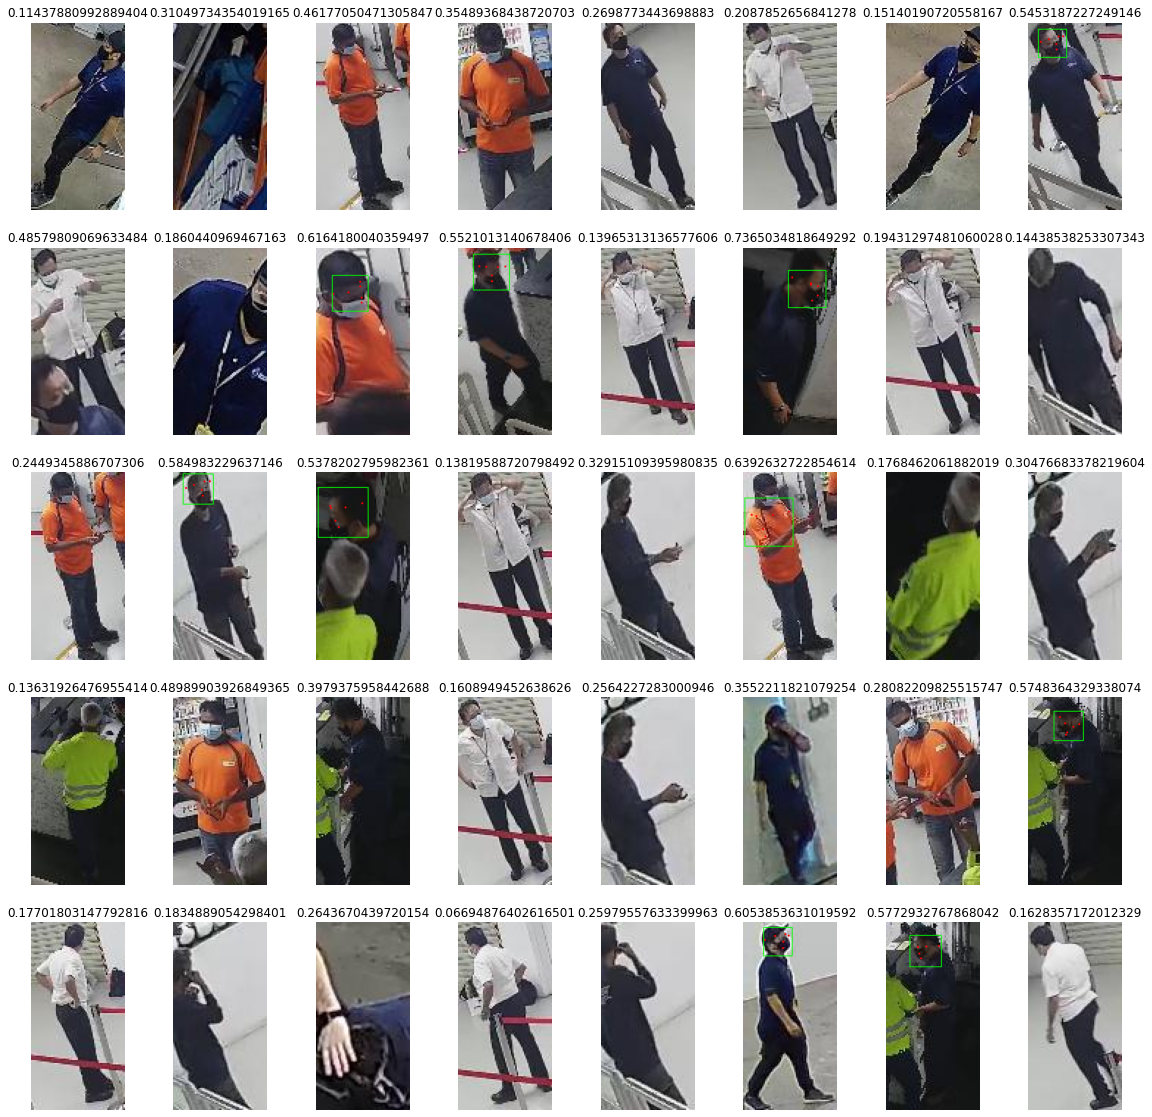

In [158]:
import mediapipe as mp
import math
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
rows, cols = 5,8
threshold = 0.5
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
idx=0
with mp_face_detection.FaceDetection(
        min_detection_confidence=0) as face_detection:
    for i in range(len(qry_results)):
        query_img_data = qry_results['query_img'].iloc[i]
        query_img = cv2.imdecode(np.frombuffer(
            query_img_data, np.uint8), cv2.IMREAD_ANYCOLOR)
        scale = 5
        dim = (query_img.shape[1] * scale, query_img.shape[0] * scale)
        img = cv2.resize(query_img, dim, interpolation=cv2.INTER_AREA)
        results = face_detection.process(
            cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        score = 0
        if results.detections:
            #max_score_idx = np.argmax([detection.score for detection in results.detections])
            score = results.detections[0].score[0]
            #print(type(score), score)
            if score >= threshold:
                mp_drawing.draw_detection(img, results.detections[0])
        x = int(idx/cols)
        y = idx % cols
        axs[x][y].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[x][y].axis('off')
        axs[x][y].set_title(str(score))
        idx += 1
        if idx >= rows*cols:
            break
plt.show()


In [197]:
sorted_human_id = qry_results.human_id.value_counts().sort_values(ascending=False)
face_scores = []
with mp_face_detection.FaceDetection(min_detection_confidence=0) as face_detection:
    for index, row in qry_results.iterrows():
        query_img_data = row['query_img']
        query_img = cv2.imdecode(np.frombuffer(
            query_img_data, np.uint8), cv2.IMREAD_ANYCOLOR)
        scale = 5
        dim = (query_img.shape[1] * scale, query_img.shape[0] * scale)
        img = cv2.resize(query_img, dim, interpolation=cv2.INTER_AREA)
        results = face_detection.process(
            cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        score = 0
        if results.detections:
            score = results.detections[0].score[0]
        face_scores.append(score)
qry_results['face_score'] = face_scores
display(qry_results.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inference_id        9709 non-null   int64  
 1   query_img_id        9709 non-null   object 
 2   query_img           9709 non-null   object 
 3   match_1_img_id      6836 non-null   object 
 4   match_1_img         9708 non-null   object 
 5   match_1_dist        9708 non-null   float64
 6   match_2_img_id      6836 non-null   object 
 7   match_2_img         9707 non-null   object 
 8   match_2_dist        9707 non-null   float64
 9   match_3_img_id      6836 non-null   object 
 10  match_3_img         9706 non-null   object 
 11  match_3_dist        9706 non-null   float64
 12  inference_datetime  9709 non-null   object 
 13  img_id              9709 non-null   object 
 14  img_path            9709 non-null   object 
 15  img                 9709 non-null   object 
 16  vector

None

In [202]:
qry_results.to_pickle('ReID_w_FaceScores.pkl')

In [213]:
qry_results = pd.read_pickle('ReID_w_FaceScores.pkl')
display(qry_results.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inference_id        9709 non-null   int64  
 1   query_img_id        9709 non-null   object 
 2   query_img           9709 non-null   object 
 3   match_1_img_id      6836 non-null   object 
 4   match_1_img         9708 non-null   object 
 5   match_1_dist        9708 non-null   float64
 6   match_2_img_id      6836 non-null   object 
 7   match_2_img         9707 non-null   object 
 8   match_2_dist        9707 non-null   float64
 9   match_3_img_id      6836 non-null   object 
 10  match_3_img         9706 non-null   object 
 11  match_3_dist        9706 non-null   float64
 12  inference_datetime  9709 non-null   object 
 13  img_id              9709 non-null   object 
 14  img_path            9709 non-null   object 
 15  img                 9709 non-null   object 
 16  vector

None

In [214]:
df_newtable = qry_results[['query_img_id', 'face_score']].rename(columns={"query_img_id": "img_id"})
display(df_newtable.info())
df_newtable.to_sql('face_scores_table', con=conn, index=False, if_exists='replace')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   img_id      9709 non-null   object 
 1   face_score  9709 non-null   float64
dtypes: float64(1), object(1)
memory usage: 151.8+ KB


None

In [217]:
query = \
'''
SELECT
    inf.query_img_id AS img_id,
    inf.query_img AS img,
    hmn.human_id AS human_id,
    fsc.face_score As face_score
FROM inference_table AS inf
INNER JOIN human_table AS hmn
    ON inf.query_img_id=hmn.img_id
INNER JOIN face_scores_table as fsc
    ON inf.query_img_id = fsc.img_id
'''
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
print(column_names)
df_facescores = pd.DataFrame(cursor.fetchall(), columns=column_names)
display(df_facescores.info())


['img_id', 'img', 'human_id', 'face_score']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   img_id      9709 non-null   object 
 1   img         9709 non-null   object 
 2   human_id    9709 non-null   object 
 3   face_score  9709 non-null   float64
dtypes: float64(1), object(3)
memory usage: 303.5+ KB


None

In [228]:
print(df_facescores.human_id.value_counts())

15      524
5       404
1       270
140     212
124     176
       ... 
2777      1
2089      1
1044      1
1737      1
998       1
Name: human_id, Length: 2873, dtype: int64


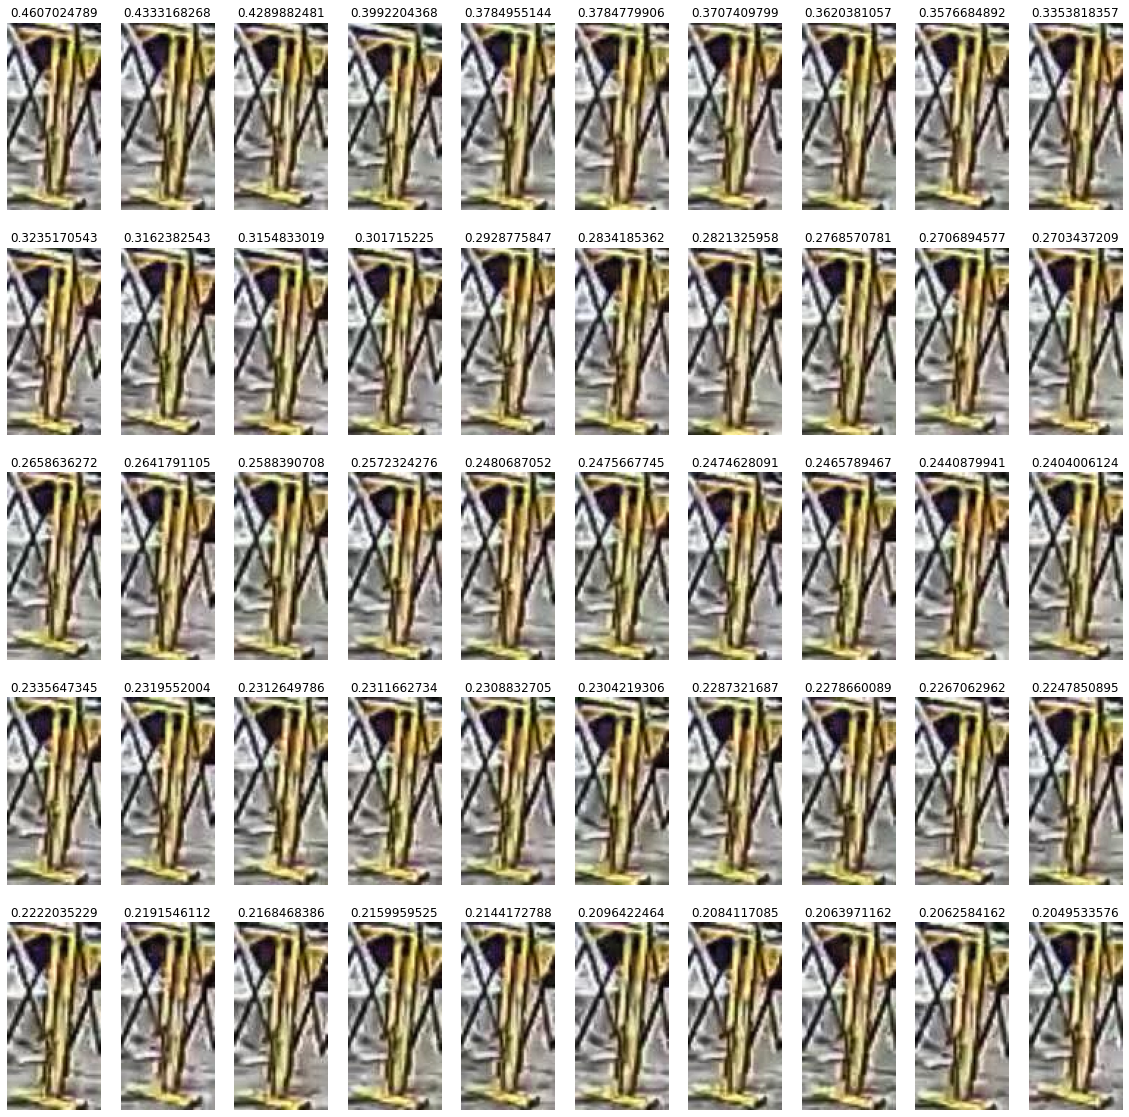

In [227]:
filtered_human_id = df_facescores[df_facescores.human_id == str(
    124)].sort_values(by=['face_score'], ascending=False)
rows, cols = 5, 10
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
enhance_image = True
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
idx=0
for index, row in filtered_human_id.iterrows():
    query_img_data = row['img']
    score = row['face_score']
    query_img = cv2.imdecode(np.frombuffer(
        query_img_data, np.uint8), cv2.IMREAD_ANYCOLOR)
    if enhance_image:
        lab = cv2.cvtColor(query_img, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        cl = clahe.apply(l)
        limg = cv2.merge((cl, a, b))
        img_output = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    else:
        img_output = query_img.copy()
    x = int(idx / cols)
    y = idx % cols
    idx += 1
    axs[x][y].imshow(cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB))
    axs[x][y].axis('off')
    axs[x][y].set_title(str(round(score,10)))
    if idx >= rows*cols:
        break
plt.show()


In [12]:
df_test = pd.DataFrame(columns=['img_id', 'is_mislabelled'])
display(df_test)

Empty DataFrame
Columns: [img_id, is_mislabelled]
Index: []

In [25]:
rows = []
for i in range(0, 25):
    rows.append({'img_id': str(i+1), 'is_mislabelled': True})
df_test = df_test.append(rows, ignore_index=True).drop_duplicates('img_id',keep='last').sort_values('img_id')
display(df_test)


img_id is_mislabelled
20      1           True
29     10           True
30     11           True
31     12           True
32     13           True
33     14           True
34     15           True
35     16           True
36     17           True
37     18           True
38     19           True
21      2           True
39     20           True
40     21           True
41     22           True
42     23           True
43     24           True
44     25           True
22      3           True
23      4           True
24      5           True
25      6           True
26      7           True
27      8           True
28      9           True

In [29]:
print(df_test[df_test.img_id == '5'].iloc[0]['is_mislabelled'])


True
